In [1]:
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('WeiseEtAl2023/cells/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/Dropbox/Extracellular_stimulation_NetPyNE/test


In [2]:
folder[15:20]

['L5_TTPC2_cADpyr232_1',
 'L5_TTPC2_cADpyr232_2',
 'L5_TTPC2_cADpyr232_3',
 'L5_TTPC2_cADpyr232_4',
 'L5_TTPC2_cADpyr232_5']

In [3]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[14:-1]    
    return templatename

In [4]:
cellnumber = 15 
cellName = folder[cellnumber]
outFolder = rootFolder+'/WeiseEtAl2023/cells/'+folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)
print ("CellNumber = %d" % cellnumber)
print ("CellName = %s" % cellName)
print ("TemplateName = %s" % cellTemplateName)

with open(outFolder + '/current_amps.dat') as current_file:
    current_content = current_file.read()

holding_current, step1_current, step2_current, step3_current = [float(x) for x in current_content.split()]
# step1_current = step2_current
print ('load step1_current from current_amps.dat = %s' % step1_current)

CellNumber = 15
CellName = L5_TTPC2_cADpyr232_1
TemplateName = cADpyr232_L5_TTPC2_8052133265
load step1_current from current_amps.dat = 0.5930628


In [5]:
holding_current,  holding_current + step1_current/1.,  holding_current + step2_current/1.,  holding_current + step3_current/1.

(-0.286011, 0.3070518, 0.3564737, 0.4058956)

In [6]:
holding_current,  holding_current + step1_current/1.2,  holding_current + step2_current/1.3,  holding_current + step3_current/1.4

(-0.286011, 0.208208, 0.208208, 0.20820800000000006)

In [7]:
step1_current = holding_current + step1_current/1.25
step1_current

0.18843924

In [8]:
# os.chdir(rootFolder)
# !nrnivmodl WeiseEtAl2023/mechanisms/

In [9]:
ls -li

total 16792
23073807 -rwxr--r-- 1 fernando fernando    1956 Jun  4 12:25 cell_modification_parameters.py*
23090405 -rwxr--r-- 1 fernando fernando    1391 Jun  5 18:06 cellwrapper3.py*
23073725 -rwxr--r-- 1 fernando fernando   52075 Jun  5 12:34 cellwrapperTMSlike.py*
24510803 drwxr-xr-x 5 fernando fernando    4096 Jun 15 10:21 explore_morphos/
23158016 -rw-r--r-- 1 fernando fernando  477034 Apr 15 11:38 Extracellular_stimulation_NetPyNE_3_Sections.ipynb
23090471 -rw-r--r-- 1 fernando fernando  184502 Jun  6 00:39 Fig_comparison_traces_soma_voltage_4steps_exp_L5_TTPC2_cADpyr232_1.png
23869999 drwxr-xr-x 2 fernando fernando    4096 May 10 23:46 HallermannEtAl2012/
23867650 -rw-rw-r-- 1 fernando fernando 4678408 Jul 13 22:57 L5_TTPC2_cADpyr232_1_cellParams.json
23866604 -rw-rw-r-- 1 fernando fernando 4735808 Jul 13 22:56 L5_TTPC2_cADpyr232_1_cellParams.pkl
23160293 -rw-r--r-- 1 fernando fernando  318125 Jun 14 12:24 LFPy_extracellular-current-stimulation.ipynb
23167964 -rw-r--r-- 1 fernan

In [10]:
from netpyne import sim, specs
import pickle

cfg = specs.SimConfig()     

cfg.duration = 638.5 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 1234, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -70}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.5

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

allpops = ['L5_TTPC']

cfg.recordCells = allpops  # which cells to record from
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_axon_1': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
                    'V_axon_2': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
                    'V_axon_3': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
                    'V_axon_4': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
                    'V_axon_5': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
                    'V_axon_6': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
                    'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                    'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
                    'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
                    # 'V_dend_70': {'sec':'dend_70', 'loc':0.5, 'var':'v'},
                    }




## Dict with traces to record
cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.025         


cfg.recordLFP = [[0, y, 0] for y in [-400]] # 1 elec on skull


cfg.simLabel = 'S1_L5_TTPC'
cfg.saveFolder = '.'
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simConfig', 'netParams'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			##  
cfg.saveCellConns = False		##  

cfg.analysis['plotTraces'] = {'include': ['L5_TTPC'], 'figSize': (12, 4), 'saveFig': False, 'overlay': True, 'oneFigPer': 'cell'}  # Plot recorded traces for this list of cells


#------------------------------------------------------------------------------
# Current inputs 
#------------------------------------------------------------------------------
cfg.addIClamp = 1

cfg.IClamp1 = {'pop': 'L5_TTPC', 'sec': 'soma_0', 'loc': 0.5, 'start': 1000, 'dur': 1000, 'amp': step1_current}
# cfg.IClamp2 = {'pop': 'L5_TTPC', 'sec': 'apic_98', 'loc': 0.5, 'start': 700, 'dur': 25, 'amp': step1_current}
# cfg.IClamp3 = {'pop': 'L5_TTPC', 'sec': 'apic_99', 'loc': 0.5, 'start': 900, 'dur': 25, 'amp': step1_current}
# cfg.IClamp4 = {'pop': 'L5_TTPC', 'sec': 'apic_100', 'loc': 0.5, 'start': 1100, 'dur': 25, 'amp': step1_current}


netParams = specs.NetParams()   # object of class NetParams to store the network parameters

#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
cellName = folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)
cellNumber = 1
cellRule = netParams.importCellParams(label=cellName + '_rule', somaAtOrigin=False,
    conds={'cellType': cellName, 'cellModel': 'HH_full'},
    fileName='cellwrapper3.py',
    cellName='loadCell_L5_TTPC2_cADpyr',
    cellInstance = True,
    cellArgs={'cellNumber': cellNumber})

#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------

## Population parameters
# pyr_positions = [[x , y , 0] for x in range(100,1100,300) for y in range(100,1100,300)]
# pyr_positions = [[x-857 , x , 0] for x in range(857,1382,250)]
pyr_positions = [[x , 857 , 210] for x in range(210,1382,2500)]
cellsList = [{'x': x, 'y': y, 'z': z} for x,y,z in pyr_positions]
netParams.popParams['L5_TTPC'] = {'cellType': cellName, 'cellModel': 'HH_full', 'cellsList': cellsList} 


# #------------------------------------------------------------------------------
# #  extracellular mechs
# #------------------------------------------------------------------------------
# for celltyp in netParams.cellParams.keys():
#     label = []
#     for secname in netParams.cellParams[celltyp]['secs'].keys():
#         netParams.cellParams[celltyp]['secs'][secname]['mechs']['extracellular'] = {}

#-----------------------------------------------------------------------------------#
# for cellMe in netParams.cellParams.keys():
#     axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['soma_0']['geom']['pt3d'][-1]
#     axon_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam']
#     axon_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L']

#     netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
#                                                                       (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
#                                                                       (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]

#     axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'][-1]
#     axon1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam']
#     axon1_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L']

#     netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
#                                                                           (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
#                                                                           (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)] 
        

#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
if cfg.addIClamp:
     for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
        params = getattr(cfg, key, None)
        [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

        #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

        # add stim source
        netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

        # connect stim source to target
        netParams.stimTargetParams[key+'_'+pop] =  {
            'source': key, 
            'conds': {'pop': pop},
            'sec': sec, 
            'loc': loc}

        
# netParams.rotateCellsRandomly = [0, 6.2832]
# sim.createSimulateAnalyze(netParams, cfg)     

False
True


In [11]:
celltyp = 'L5_TTPC2_cADpyr232_1_rule'
netParams.cellParams[celltyp]['secLists']['all'] = list(netParams.cellParams[celltyp]['secs'].keys())
len(netParams.cellParams[celltyp]['secLists']['all'])

976

In [12]:
netParams.cellParams[celltyp]['secLists']['all'] = list(netParams.cellParams[celltyp]['secs'].keys())
netParams.cellParams[celltyp]['secLists']['somatic'] = [sec for sec in list(netParams.cellParams[celltyp]['secs'].keys()) if 'soma' in sec]
netParams.cellParams[celltyp]['secLists']['apical'] = [sec for sec in list(netParams.cellParams[celltyp]['secs'].keys()) if 'apic' in sec]
netParams.cellParams[celltyp]['secLists']['basal'] = [sec for sec in list(netParams.cellParams[celltyp]['secs'].keys()) if 'dend' in sec]
netParams.cellParams[celltyp]['secLists']['axonal'] = [sec for sec in list(netParams.cellParams[celltyp]['secs'].keys()) if 'Node' in sec or 'axon' in sec or 'y' in sec]

In [13]:
for celltyp in netParams.cellParams.keys():
    label = []
    for secname in netParams.cellParams[celltyp]['secs'].keys():
        netParams.cellParams[celltyp]['secs'][secname]['mechs']['extracellular'] = {}
        del netParams.cellParams[celltyp]['secs'][secname].mechs.xtra

In [14]:
netParams.cellParams[celltyp]['secs']['Node_113']['geom']['diam']

1000.0

In [15]:
netParams.cellParams[celltyp]['secs']['Node_113']['geom']['diam'] = 1.0

In [16]:
netParams.cellParams[celltyp]['secs']['Node_113']['geom']['pt3d']

[(-22.136661529541016, -6.852905750274658, -709.5120239257812, 1000.0),
 (-22.494400024414062, -7.216529846191406, -710.219970703125, 1000.0),
 (-22.545791625976562, -7.267182350158691, -710.3250122070312, 1000.0)]

In [17]:
netParams.cellParams[celltyp]['secs']['Node_113']['geom']['pt3d'] = [(-22.136661529541016, -6.852905750274658, -709.5120239257812, 1.0),
 (-22.494400024414062, -7.216529846191406, -710.219970703125, 1.0),
 (-22.545791625976562, -7.267182350158691, -710.3250122070312, 1.0)]

In [18]:
# for celltyp in netParams.cellParams.keys():
#     label = []
#     for secname in netParams.cellParams[celltyp]['secs'].keys():
#         print(secname,netParams.cellParams[celltyp]['secs'][secname]['geom']['L'],netParams.cellParams[celltyp]['secs'][secname]['geom']['diam'])

In [19]:
netParams.saveCellParamsRule(label=cellName + '_rule', fileName=cellName+'_cellParams.pkl')
netParams.saveCellParamsRule(label=cellName + '_rule', fileName=cellName+'_cellParams.json')

In [20]:
cfg.verbose=True
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.defineCellShapes()  # in case some cells had stylized morphologies without 3d pts
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2024-07-13 23:18:48.092831

Creating network of 1 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop 0, on node 0, 
Instantiated 1 cells of population L5_TTPC
  Number of cells on node 0: 1 
  Done; cell creation time = 0.16 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Added IClamp1 IClamp to cell gid=0, sec=soma_0, loc=0.5, delay=1000, dur=1000, amp=0.18843924
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
  Recording  V_soma from cell  0  with parameters:  {'sec': 'soma_0', 'loc': 0.5, 'var': 'v'}
Vector[33040]
  Recording  V_axon_0 from cell  0  with parameters:  {'sec': 'axon_0', 'loc': 0.5, 'var': 'v'}
Vector[33041]
  Recording  V_axon_1 from cell  0  with parameters:  {'sec': 'Myelin_0', 'loc': 0.5, 'var': 'v'}
Vector[33042]
  Recording  V_axon_2 from cell  0  with parameters:  {'sec': 'Myelin_10',

{spkt: Vector[33038], spkid: Vector[33039], stims: {cell_0: {}}, V_soma: {cell_0: Vector[33053]}, V_axon_0: {cell_0: Vector[33054]}, V_axon_1: {cell_0: Vector[33055]}, V_axon_2: {cell_0: Vector[33056]}, V_axon_3: {cell_0: Vector[33057]}, V_axon_4: {cell_0: Vector[33058]}, V_axon_5: {cell_0: Vector[33059]}, V_axon_6: {cell_0: Vector[33060]}, V_apic_0: {cell_0: Vector[33061]}, V_apic_5: {cell_0: Vector[33062]}, V_apic_95: {cell_0: Vector[33063]}, V_dend_5: {cell_0: Vector[33064]}, V_dend_65: {cell_0: Vector[33065]}, t: Vector[33066], LFP: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), _repr_mimebundle_: {}}


 {'cellType': 'L5_TTPC2_cADpyr232_1', 'cellModel': 'HH_full', 'pop': 'L5_TTPC', 'x': 210, 'y': 857, 'z': 210, 'xnorm': 2.1, 'ynorm': 8.57, 'znorm': 2.1}

Setting h global variables ...
  h.celsius = 34
  h.v_init = -70
  h.tstop = 638.5
Minimum delay (time-step for queue exchange) is 10.00
0.0s

Running simulation using NEURON for 638.5 ms...
0.5s
  Done; run time = 198.32 s; real-time ratio: 0.00.

Gathering data...
  Done; gather time = 0.17 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 1 (1.57 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 198.32 s
   L5_TTPC : 1.566 Hz
Plotting recorded cell traces ... cell


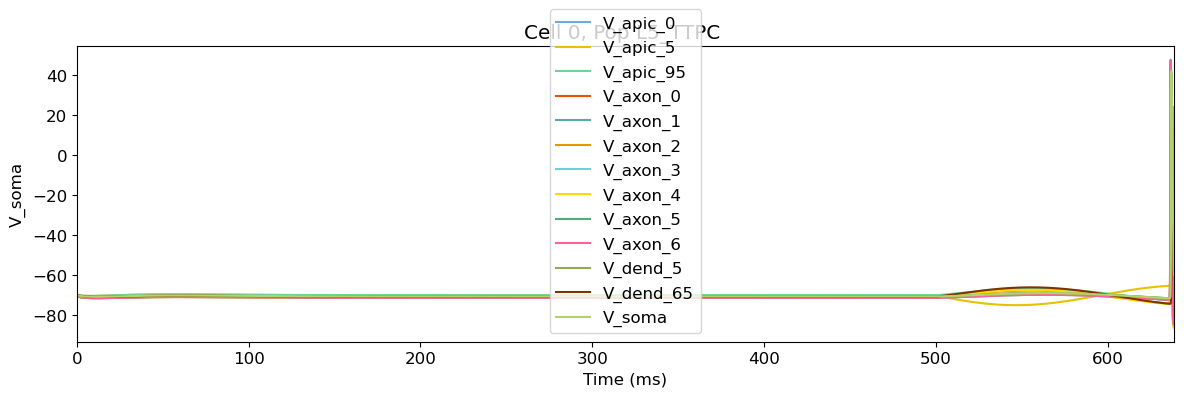

  Done; plotting time = 1.25 s

Total time = 201.08 s
Plotting 3D cell shape ...


(<Figure size 640x480 with 1 Axes>, {})

In [21]:
def collect_pt3d(self, section):
        """        collect the pt3d info, for each section
        """
        n3dsec = 0
        r3dsec = np.zeros(3)
        for sec in [sec for secName, sec in self.secs.items() if section in secName]:
            sec['hObj'].push()
            n3d = int(neuron.h.n3d())  # get number of n3d points in each section
            # print("get number of n3d points in each section",n3d)
            r3d = np.zeros((3, n3d))  # to hold locations of 3D morphology for the current section
            n3dsec += n3d

            for i in range(n3d):
                r3dsec[0] += neuron.h.x3d(i)
                r3dsec[1] += neuron.h.y3d(i)
                r3dsec[2] += neuron.h.z3d(i)
            
            neuron.h.pop_section()

        r3dsec /= n3dsec
        
        return r3dsec
    
def getSecsPos(self, secList):
        """        Get Secs position
        """
        x3d, y3d, z3d = [], [], []
        
        for secName in secList:
            # print(secName)
            r3dsec = collect_pt3d(self, secName)
            # print(secName, r3dsec)
            
            x3d.append(r3dsec[0])
            y3d.append(r3dsec[1])
            z3d.append(r3dsec[2])
            
        return x3d, y3d, z3d
    
def insert_v_ext(self, v_ext, t_ext):

    self.t_ext = neuron.h.Vector(t_ext)
    self.v_ext = []
    for v in v_ext:
        self.v_ext.append(neuron.h.Vector(v))
    
    # play v_ext into e_extracellular reference
    i = 0
    for secName, sec in self.secs.items(): 
        # print(secName,i)
        for seg in sec['hObj']:
                self.v_ext[i].play(seg._ref_e_extracellular, self.t_ext)
        i += 1
  
def make_extracellular_stimuli(acs_params, self, secList):
    """ Function to calculate and apply external potential """
    x0, y0, z0 = acs_params['position']
    ext_field = np.vectorize(lambda x, y, z: 1 / (4 * np.pi *
                            (acs_params['sigma'] * 
                            np.sqrt((x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2) + skull_attenuation)))

    stimstart = acs_params['stimstart']
    stimend = acs_params['stimend']
    stimdif = stimend-stimstart

    # MAKING THE EXTERNAL FIELD
    n_tsteps = int(stimdif / cfg.dt + 1)
    n_start = int(stimstart/cfg.dt)
    n_end = int(stimend/cfg.dt + 1)
    t = np.arange(start=n_start, stop=n_end) * cfg.dt
    pulse = acs_params['amp'] * 1000. * \
        np.sin(2 * np.pi * acs_params['frequency'] * t / 1000)

    totnsegs = len(secList)    
    v_cell_ext = np.zeros((totnsegs, n_tsteps))    
    v_cell_ext[:, :] = ext_field(getSecsPos(metype,secList)[0], -1*np.array(getSecsPos(metype, secList)[1]), 
                                 getSecsPos(metype,secList)[2]).reshape(totnsegs, 1) * pulse.reshape(1, n_tsteps)
    
    insert_v_ext(self, v_cell_ext, t)

    return v_cell_ext, self


# The parameters of the extracellular point current source
acs_params = {'position': [0.0, -1710.0, 0.0],  # um # y = [pia, bone]
              'amp': 1250.,  # uA,
              'stimstart': 500,  # ms
              'stimend': 636.5,  # ms
              'frequency': 5,  # Hz
              'sigma': 0.57  # decay constant S/m
              }

skull_attenuation = 0.01*710 #conductivity of bone(S/m) * thickness of rat skull um

#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        # print(secList)
        v_cell_ext, cell = make_extracellular_stimuli(acs_params, metype,secList)


sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc
sim.analysis.plotShape()  

(976, 5461)


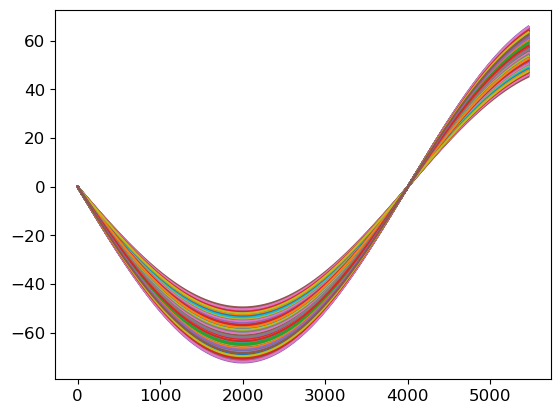

In [22]:
print(np.shape(v_cell_ext))
for v in v_cell_ext:
    plt.plot(v)


 {'cellType': 'L5_TTPC2_cADpyr232_1', 'cellModel': 'HH_full', 'pop': 'L5_TTPC', 'x': 210, 'y': 857, 'z': 210, 'xnorm': 2.1, 'ynorm': 8.57, 'znorm': 2.1}

 {'cellType': 'L5_TTPC2_cADpyr232_1', 'cellModel': 'HH_full', 'pop': 'L5_TTPC', 'x': 210, 'y': 857, 'z': 210, 'xnorm': 2.1, 'ynorm': 8.57, 'znorm': 2.1}


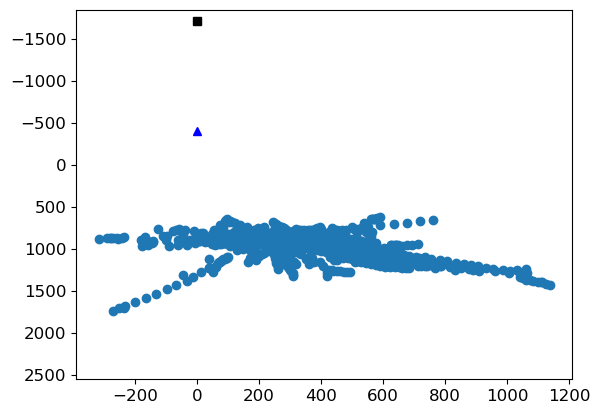

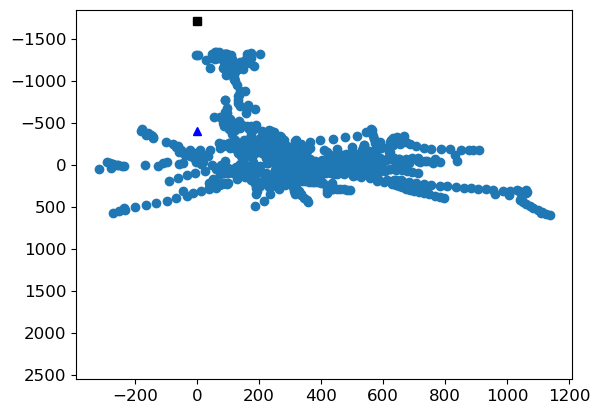

In [23]:
figure = plt.figure()
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        plt.plot(0,-400,'b^')
        plt.plot(acs_params['position'][0],acs_params['position'][1],'ks')
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        plt.plot(np.array(getSecsPos(metype, secList)[0]),-1*np.array(getSecsPos(metype, secList)[1]),'o')
        # plt.plot(np.array(getSecsPos(metype, secList)[0]),-1*np.array(getSecsPos(metype, secList)[2]),'o')
        plt.ylim(2550,-1850)
        # print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[2]).mean(axis=-1))

figure = plt.figure()
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        plt.plot(0,-400,'b^')
        plt.plot(acs_params['position'][0],acs_params['position'][1],'ks')
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        # plt.plot(np.array(getSecsPos(metype, secList)[0]),-1*np.array(getSecsPos(metype, secList)[1]),'o')
        plt.plot(np.array(getSecsPos(metype, secList)[0]),-1*np.array(getSecsPos(metype, secList)[2]),'o')
        plt.ylim(2550,-1850)
        # print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[2]).mean(axis=-1))

Plotting LFP electrode locations...
Plotting 3D cell shape ...
Preparing LFP data...
Plotting LFP time series...


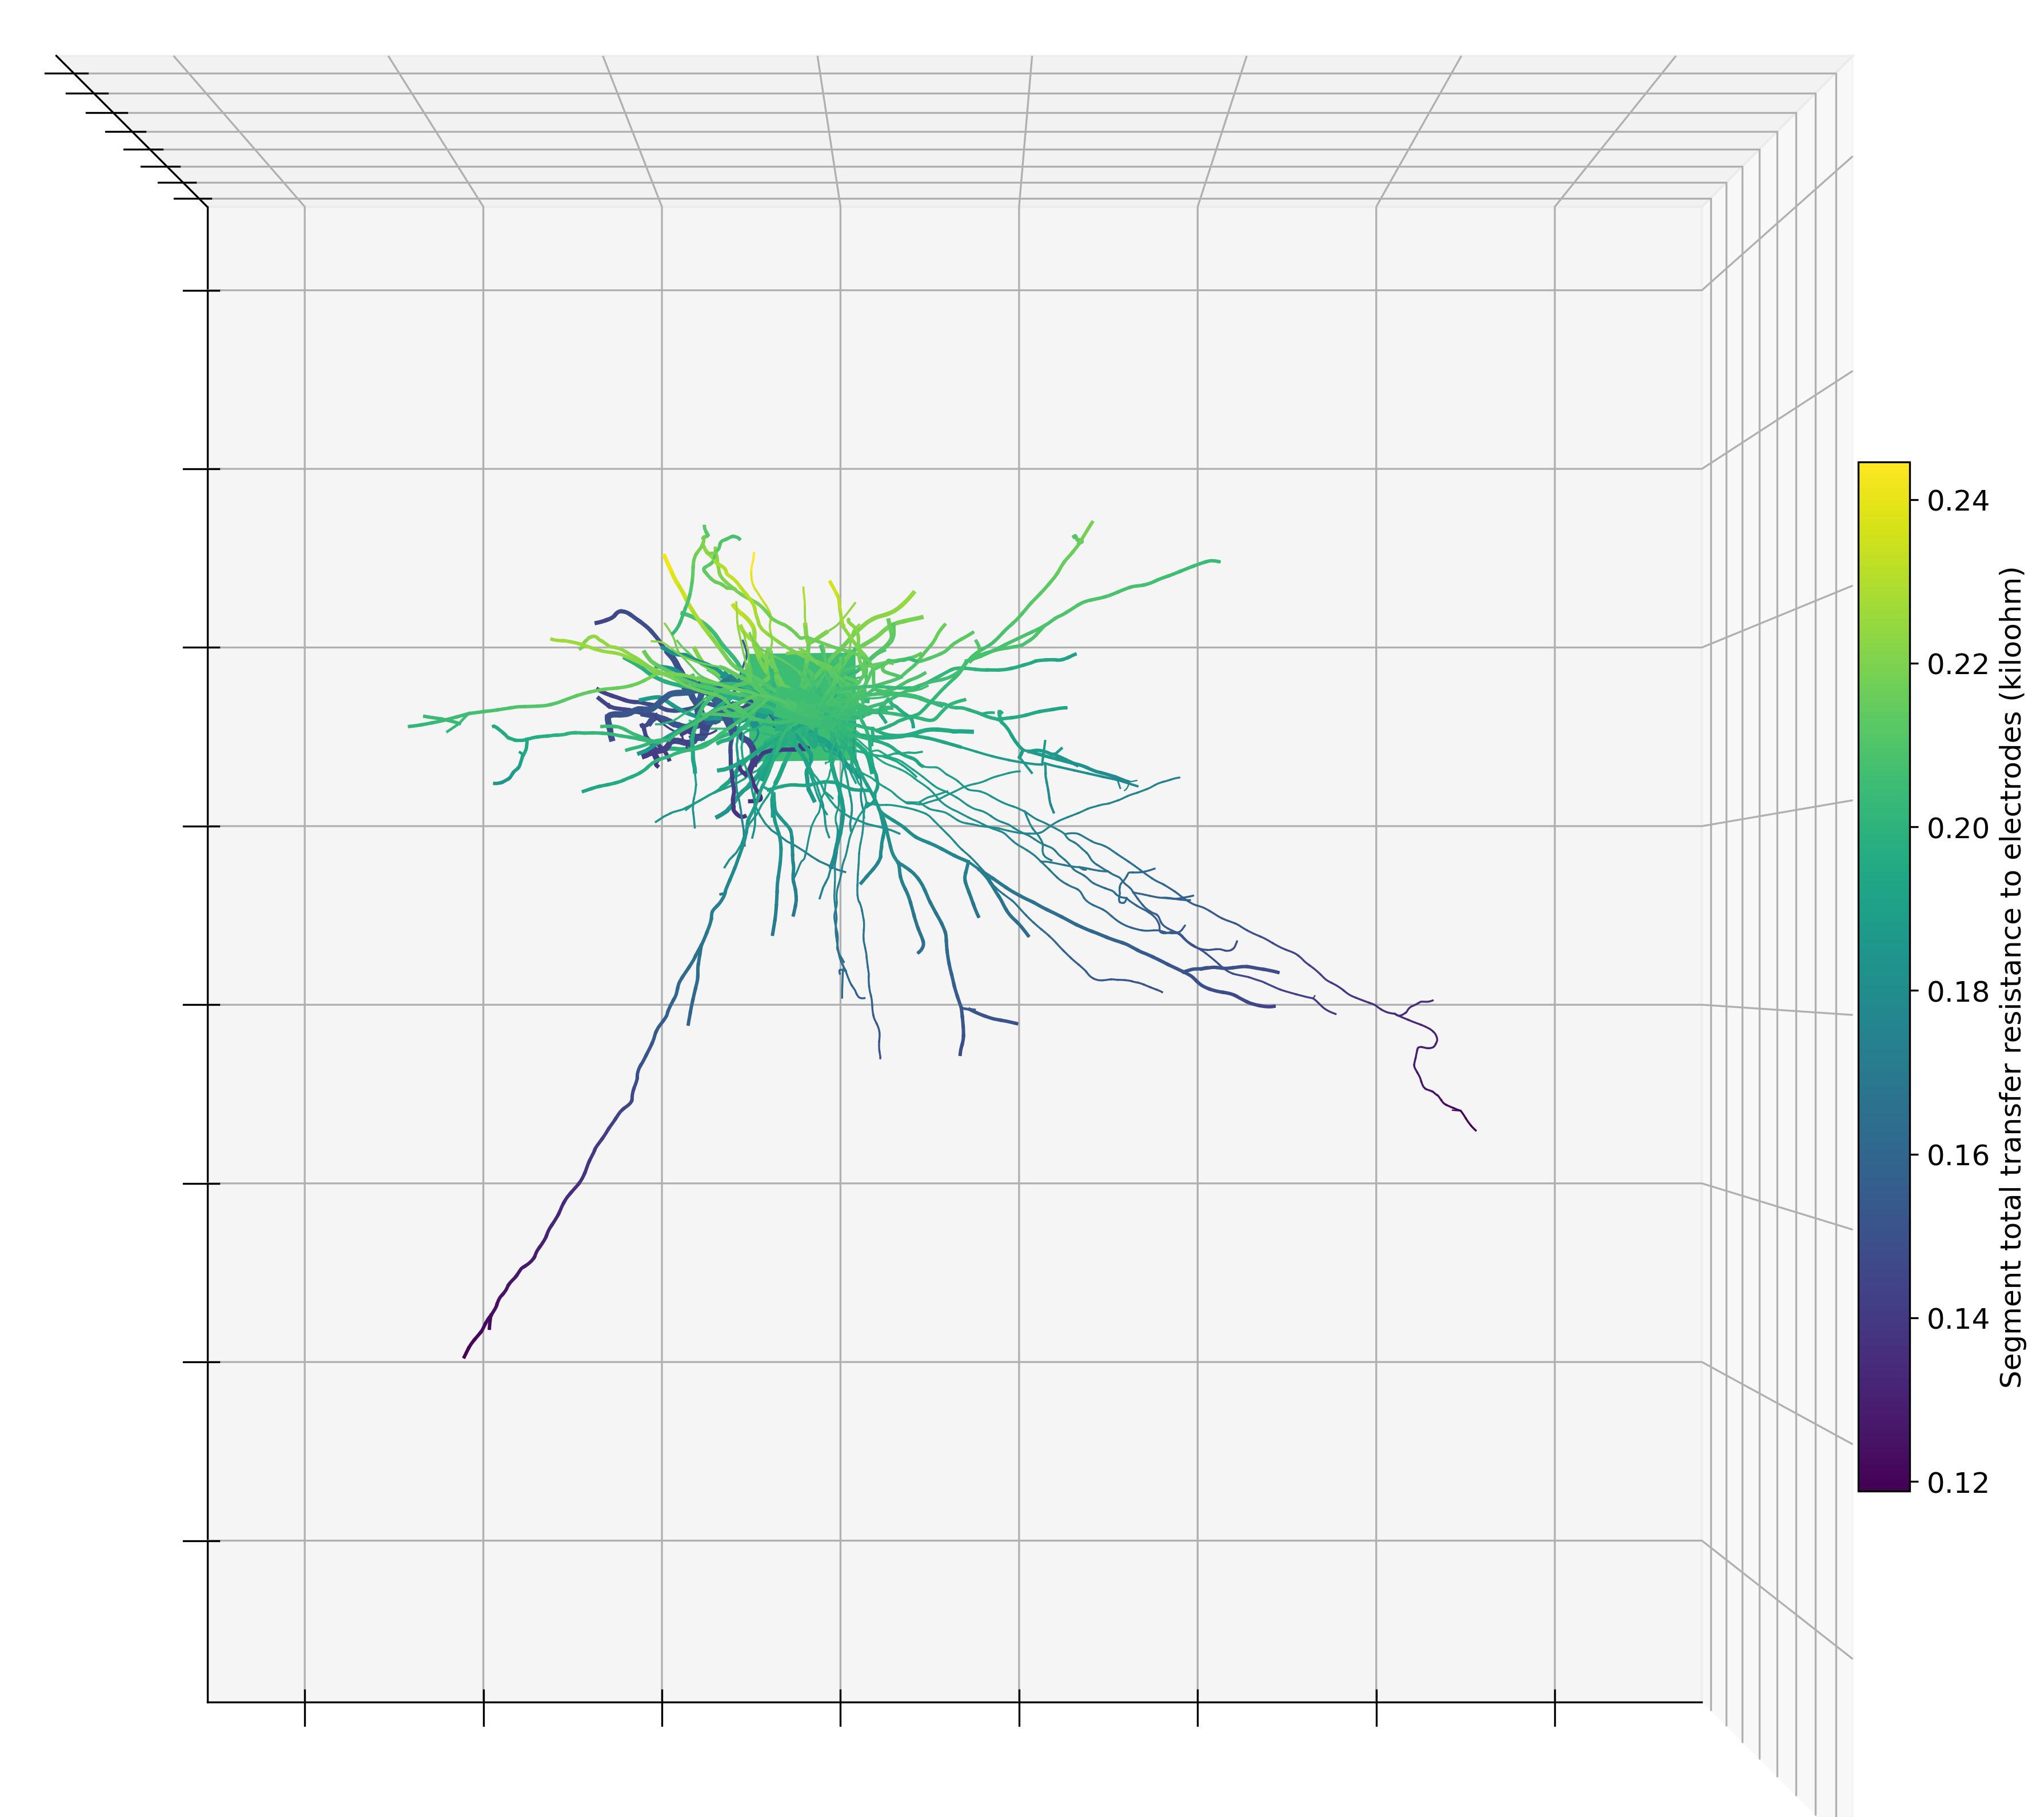

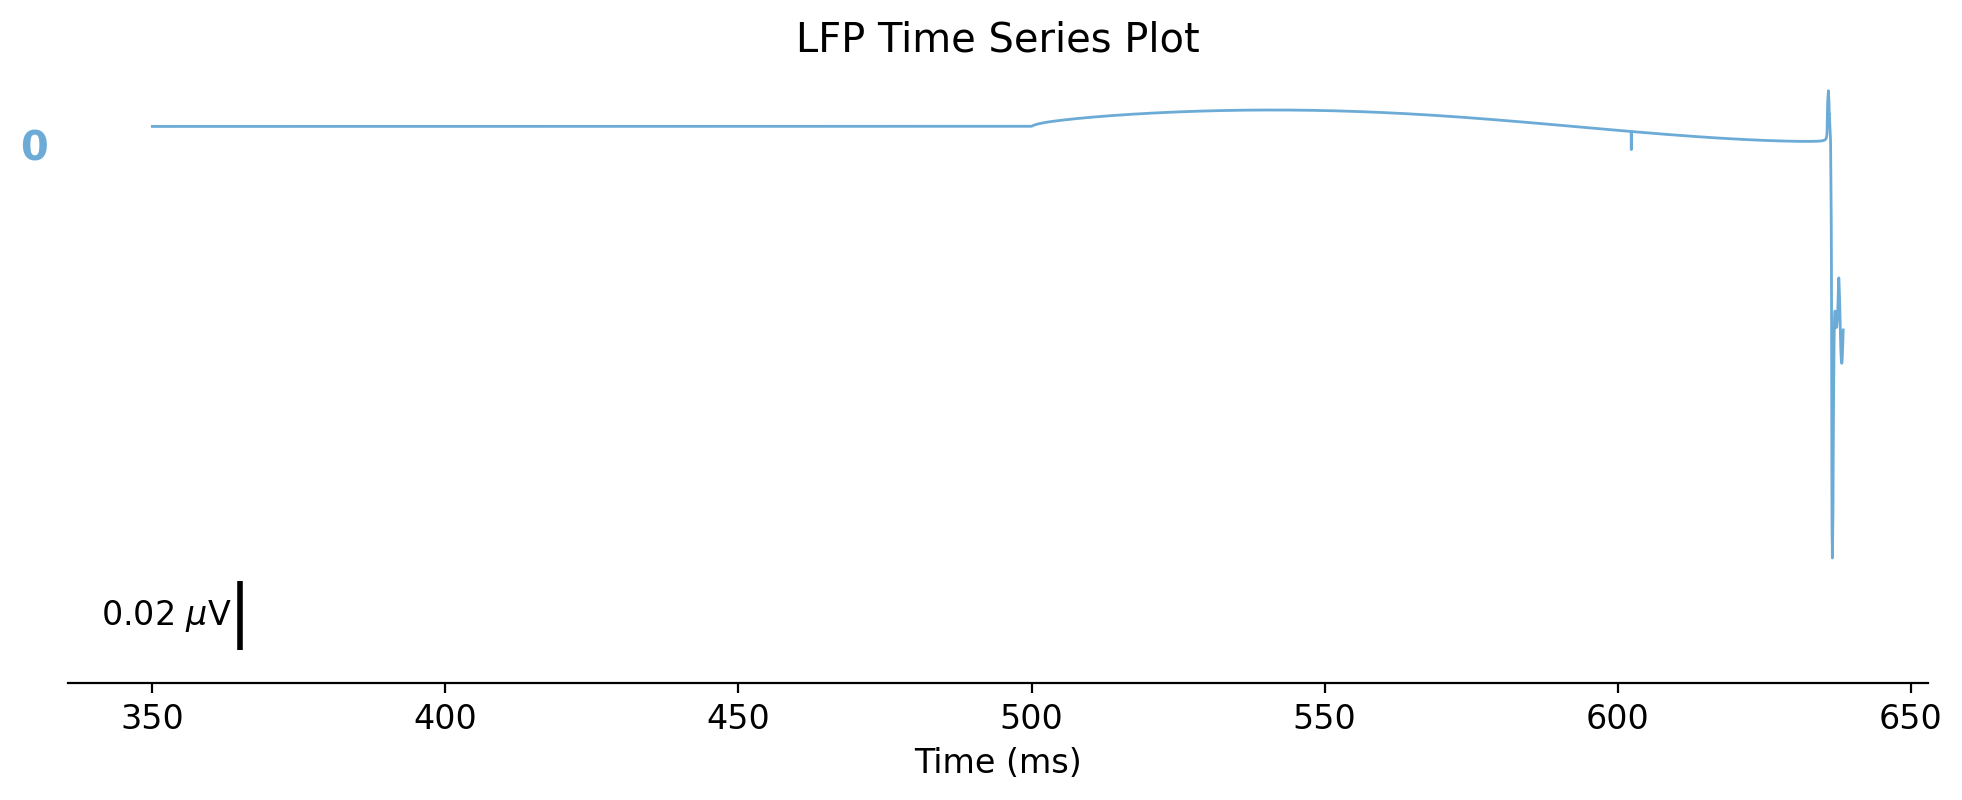

In [24]:
sim.analysis.plotLFP(**{'plots': ['locations'], 
        'figSize': (12,12), 
        'saveData': False, 
        'saveFig': False, 'showFig': False, 'dpi': 300})

sim.analysis.plotLFP(**{'plots': ['timeSeries'], 
        'electrodes': [0], #'avg', 
        'timeRange': [350, cfg.duration], 
        'figSize': (12,4), 'saveFig': False, 'showFig': False})

Plotting 3D cell shape ...
Plotting 3D cell shape ...


(<Figure size 640x480 with 2 Axes>, {})

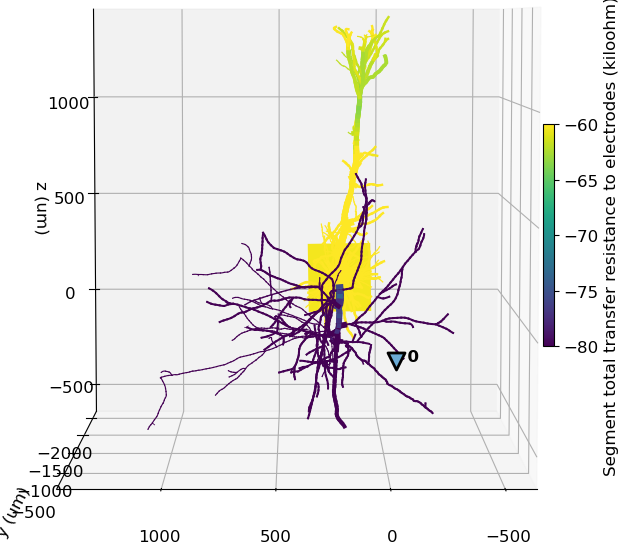

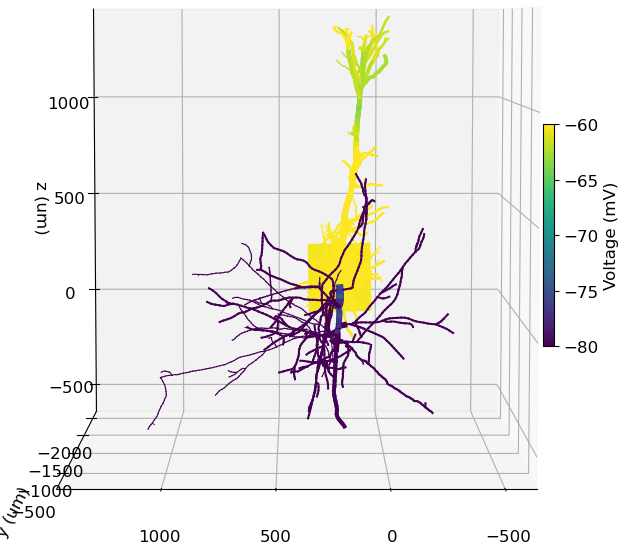

In [25]:
sim.analysis.plotShape(includePre=['L5_TTPC'], includePost=['L5_TTPC'], includeAxon=False, showSyns=False, showElectrodes=[0],
    cvar= 'voltage', dist=0.6, elev=5, azim=90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=False, synSize=2)
sim.analysis.plotShape(includePre=['L5_TTPC'], includePost=['L5_TTPC'], includeAxon=True, showSyns=False, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=5, azim=90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=False, synSize=2)

Plotting 3D cell shape ...
Plotting 3D cell shape ...


(<Figure size 640x480 with 2 Axes>, {})

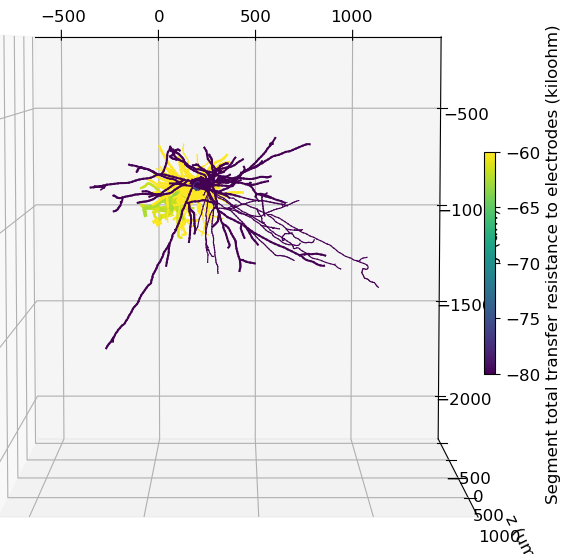

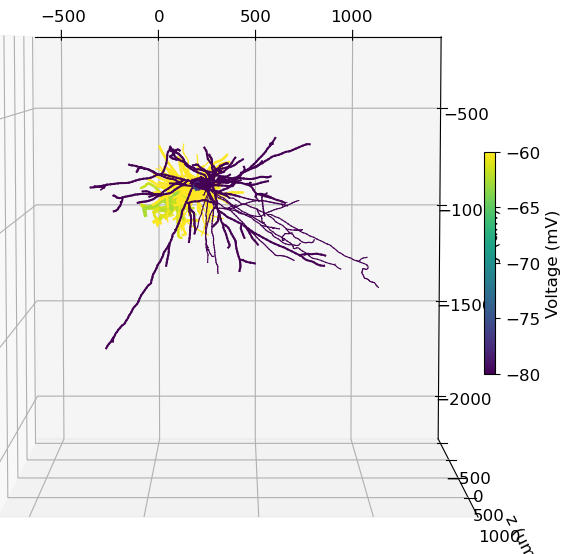

In [26]:
sim.analysis.plotShape(includePre=['L5_TTPC'], includePost=['L5_TTPC'], includeAxon=False, showSyns=False, showElectrodes=[0],
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=False, synSize=2)
sim.analysis.plotShape(includePre=['L5_TTPC'], includePost=['L5_TTPC'], includeAxon=True, showSyns=False, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=False, synSize=2)

Plotting recorded cell traces ... cell


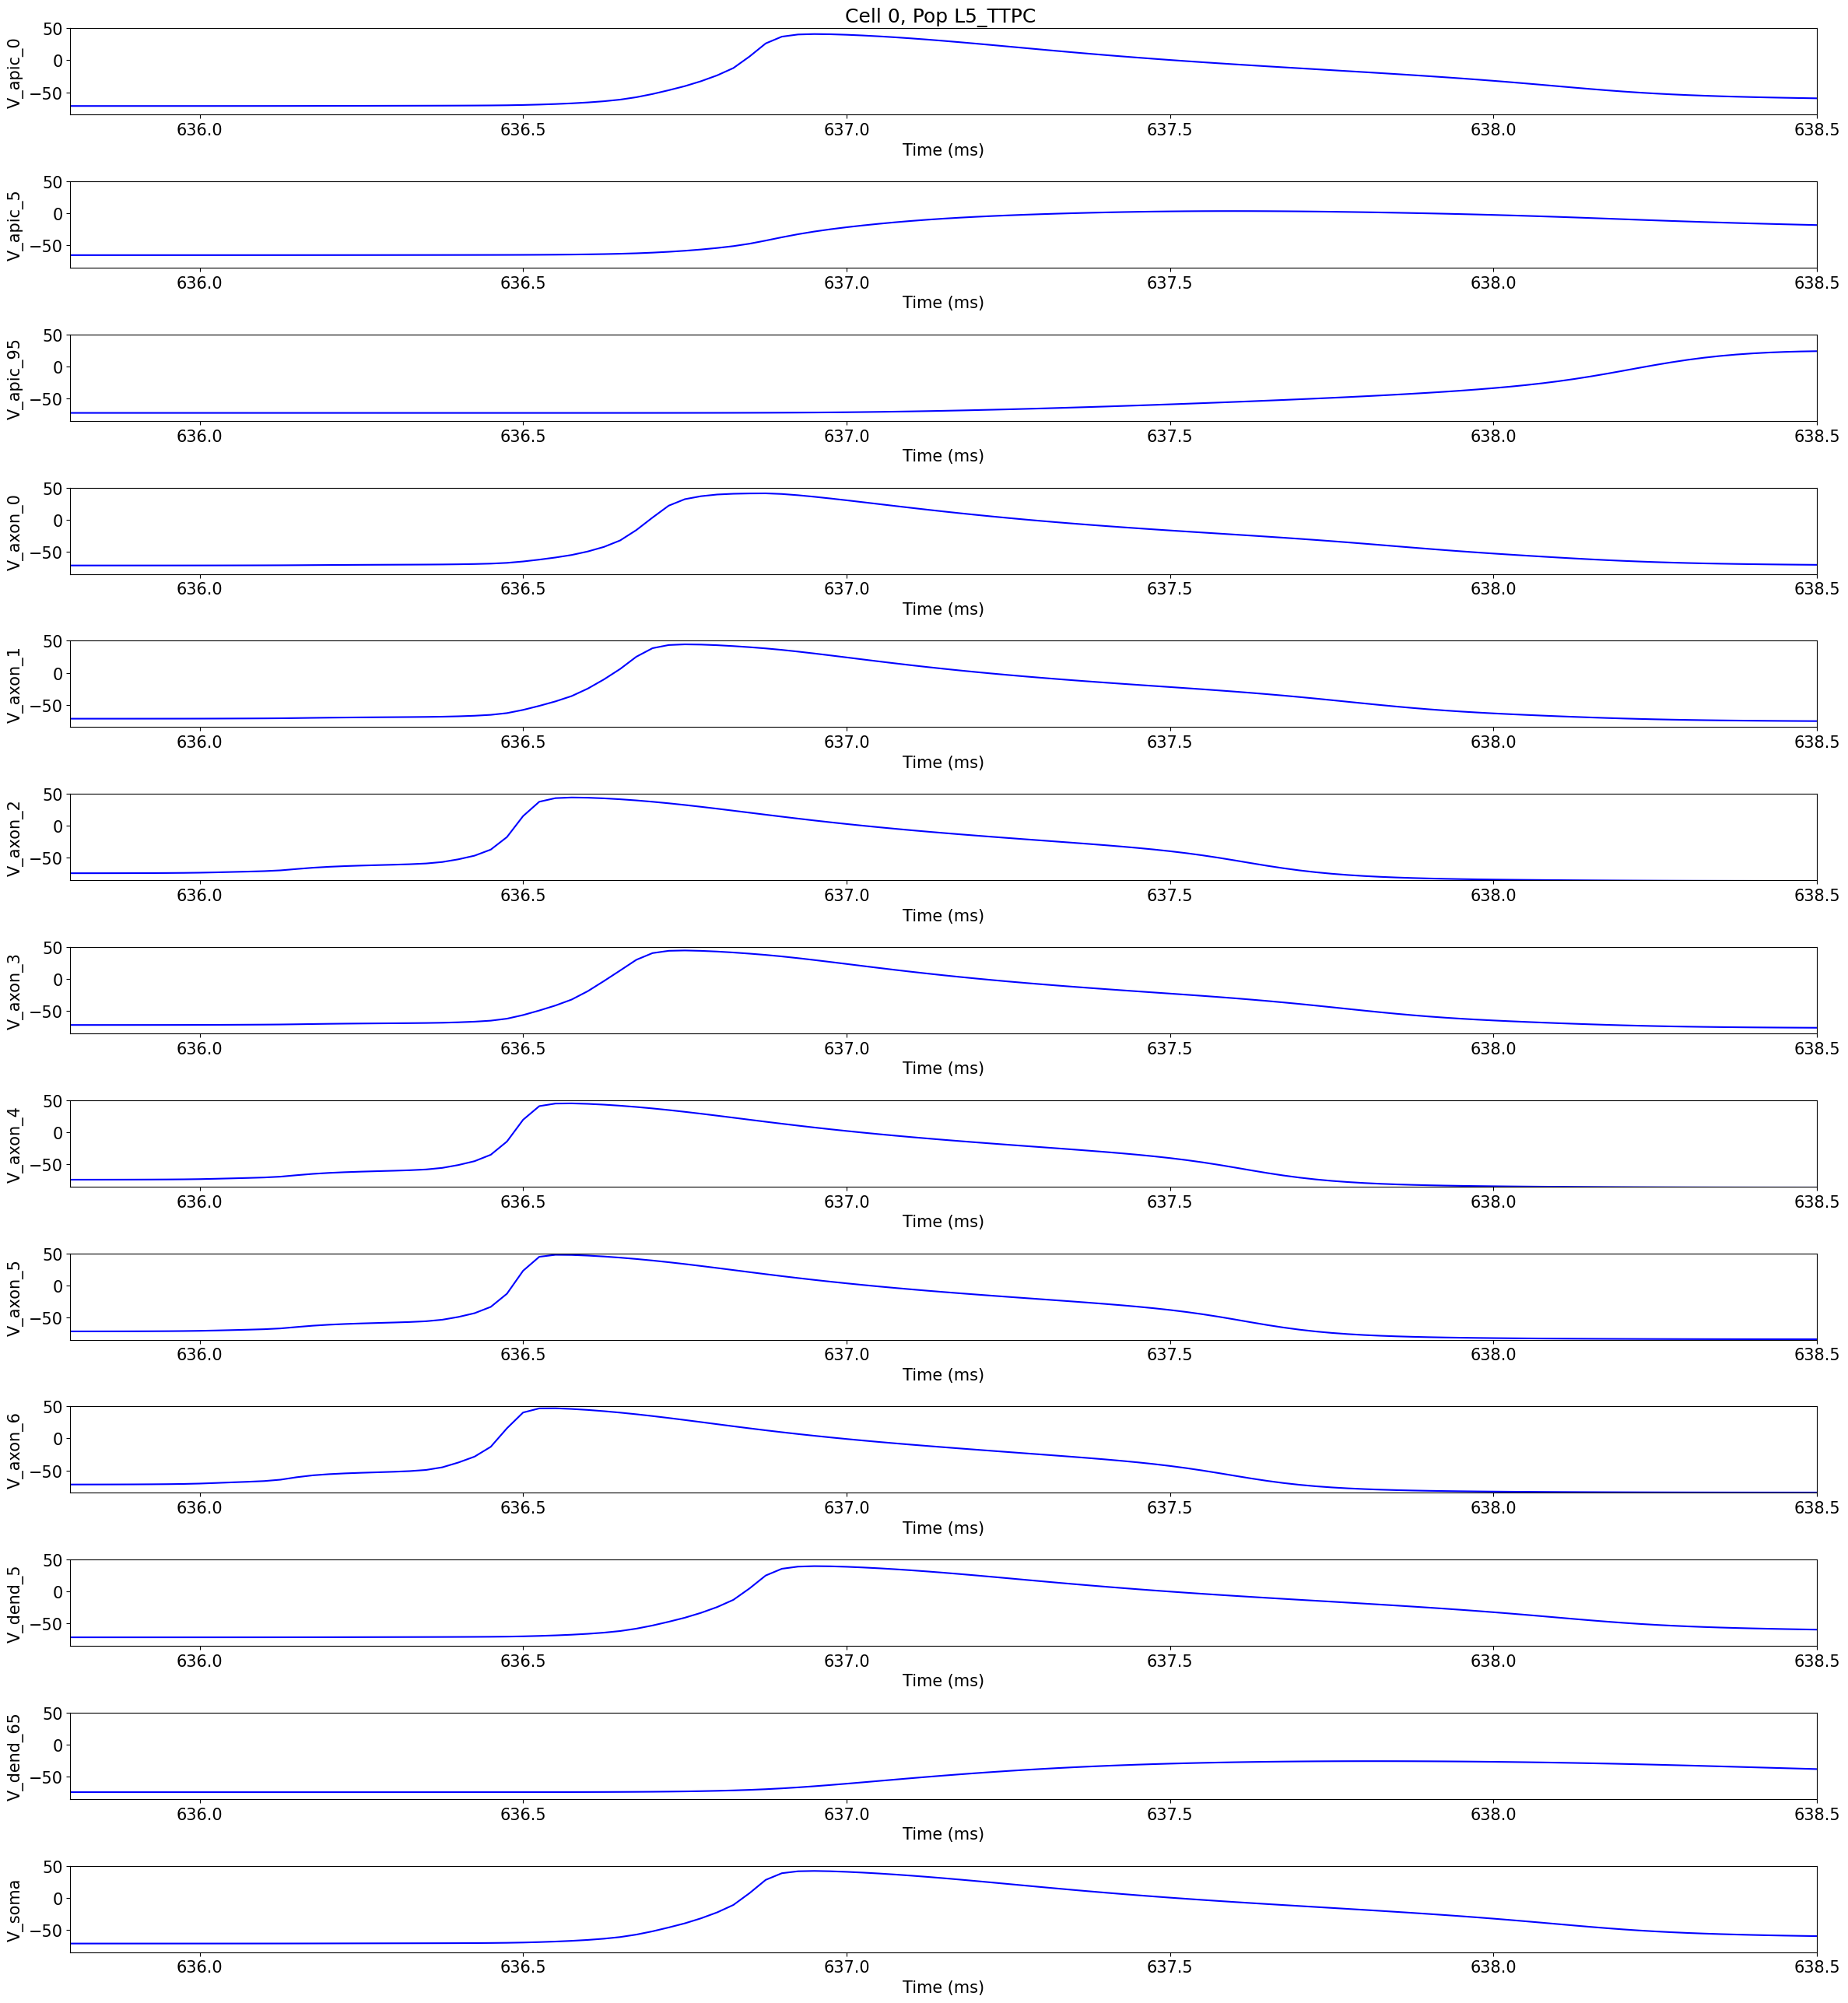

In [27]:
sim.analysis.plotTraces(overlay=False, oneFigPer='cell', timeRange = [635.8, 638.5], ylim=[-85,50], figSize=(24,26), fontSize=15, saveFig=False);

In [28]:
netParams.cellParams['L5_TTPC2_cADpyr232_1_rule']['secs']['soma_0']

{geom: {L: 26.11267539383973, nseg: 1, diam: 44.982421875, Ra: 100.0, cm: 1.0, pt3d: [(1.1156564950942993, -0.0, -14.01707649230957, 44.982421875), (1.1375269889831543, -0.0, -12.711626052856445, 44.982421875), (1.1593974828720093, -0.0, -11.406174659729004, 44.982421875), (1.1812679767608643, -0.0, -10.100724220275879, 44.982421875), (1.2031383514404297, -0.0, -8.795273780822754, 44.982421875), (1.2250088453292847, -0.0, -7.489823341369629, 44.982421875), (1.2468793392181396, -0.0, -6.184372901916504, 44.982421875), (1.2687498331069946, -0.0, -4.878921985626221, 44.982421875), (1.29062020778656, -0.0, -3.5734715461730957, 44.982421875), (1.312490701675415, -0.0, -2.2680208683013916, 44.982421875), (1.33436119556427, -0.0, -0.962570309638977, 44.982421875), (1.3562315702438354, -0.0, 0.3428802788257599, 44.982421875), (1.3781020641326904, -0.0, 1.6483309268951416, 44.982421875), (1.3999725580215454, -0.0, 2.9537813663482666, 44.982421875), (1.4218430519104004, -0.0, 4.259232044219971, 

In [29]:
for section in netParams.cellParams['L5_TTPC2_cADpyr232_1_rule']['secLists']['axonal']:
    print(section,'->',netParams.cellParams['L5_TTPC2_cADpyr232_1_rule']['secs'][section]['topol']['parentSec'])

axon_0 -> soma_0
Myelin_0 -> axon_0
Myelin_1 -> Node_0
Myelin_2 -> Node_1
Myelin_3 -> Node_2
Myelin_4 -> Node_3
Myelin_5 -> Node_4
Myelin_6 -> Node_5
Myelin_7 -> Node_6
Myelin_8 -> Node_7
Myelin_9 -> Node_8
Myelin_10 -> Node_9
Myelin_11 -> Unmyelin_0
Myelin_12 -> Node_11
Myelin_13 -> Node_12
Myelin_14 -> Node_13
Myelin_15 -> Node_14
Myelin_16 -> Node_15
Myelin_17 -> Node_16
Myelin_18 -> Unmyelin_1
Myelin_19 -> Unmyelin_1
Myelin_20 -> Node_19
Myelin_21 -> Node_20
Myelin_22 -> Node_21
Myelin_23 -> Node_21
Myelin_24 -> Node_23
Myelin_25 -> Node_24
Myelin_26 -> Node_17
Myelin_27 -> Node_26
Myelin_28 -> Node_27
Myelin_29 -> Node_28
Myelin_30 -> Node_29
Myelin_31 -> Node_30
Myelin_32 -> Node_30
Myelin_33 -> Node_29
Myelin_34 -> Node_15
Myelin_35 -> Node_34
Myelin_36 -> Node_35
Myelin_37 -> Node_13
Myelin_38 -> Node_37
Myelin_39 -> Node_38
Myelin_40 -> Node_39
Myelin_41 -> Node_40
Myelin_42 -> Node_41
Myelin_43 -> Node_42
Myelin_44 -> Node_43
Myelin_45 -> Node_44
Myelin_46 -> Node_45
Myelin_4

Plotting 2D representation of network cell locations and connections...


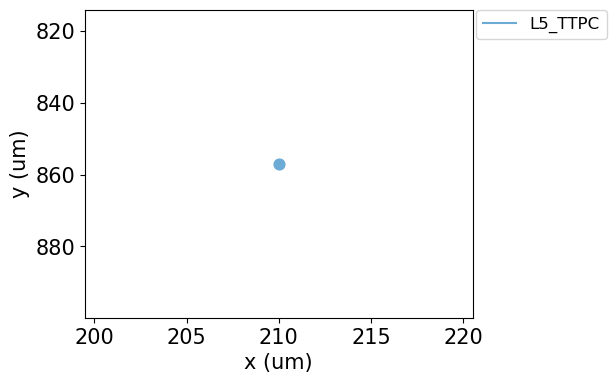

(<Figure size 500x400 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [210],
  'posY': [857],
  'posXpre': [],
  'posXpost': [],
  'posYpre': [],
  'posYpost': []})

In [30]:
sim.analysis.plot2Dnet(figSize=(5, 4), fontSize=12)